# Créer du bruit sur une image vide

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## En utilisant np.random.randn

In [13]:
background = np.zeros((128,128))
noise = np.random.randn(128, 128)
image = background + noise
print('Image min: {}, Image max: {}'.format(image.min(), image.max()))

Image min: -3.730762320224185, Image max: 4.45270347279929


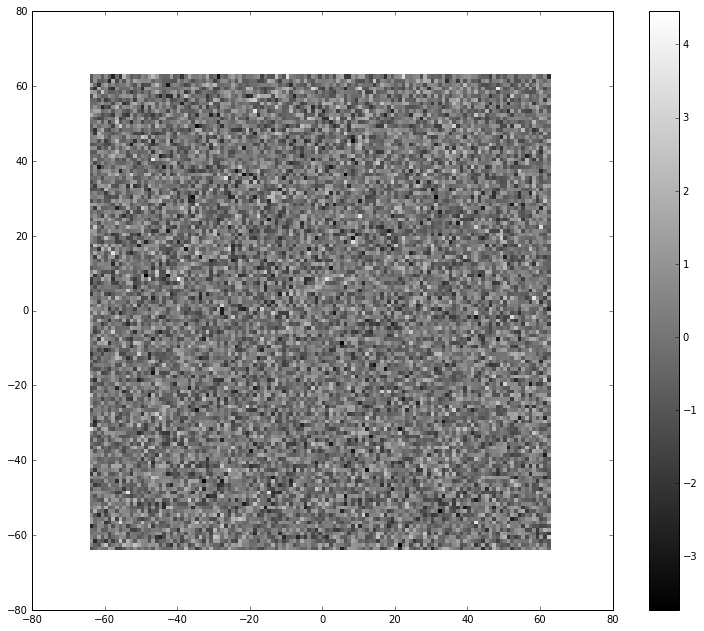

In [14]:
fig, ax = plt.subplots(figsize=(13,10.725))
cmap = ax.pcolor(np.arange(-64,64), np.arange(-64,64), image)
fig.colorbar(cmap)

## En utilisant np.random.normal

In [15]:
background = np.zeros((128,128))
noise = np.random.normal(0,1,(128, 128))
image = background + noise
print('Image min: {}, Image max: {}'.format(image.min(), image.max()))

Image min: -4.223607722583322, Image max: 4.43320775223196


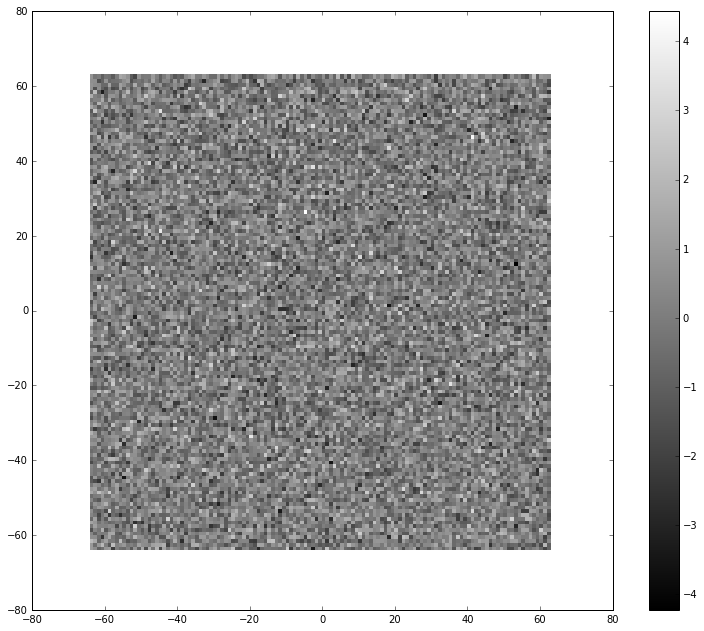

In [16]:
fig, ax = plt.subplots(figsize=(13,10.725))
cmap = ax.pcolor(np.arange(-64,64), np.arange(-64,64), image)
fig.colorbar(cmap)

## En utilisant la librairie noise (bruit perlin)

In [17]:
import noise
help(noise)

Help on package noise:

NAME
    noise - Noise functions for procedural generation of content

DESCRIPTION
    Contains native code implementations of Perlin improved noise (with
    fBm capabilities) and Perlin simplex noise. Also contains a fast
    "fake noise" implementation in GLSL for execution in shaders.
    
    Copyright (c) 2008, Casey Duncan (casey dot duncan at gmail dot com)

PACKAGE CONTENTS
    _perlin
    _simplex
    perlin
    setup
    shader
    shader_noise
    test

FUNCTIONS
    pnoise1 = noise1(...)
        noise1(x, octaves=1, persistence=0.5, lacunarity=2.0, repeat=1024, base=0.0)
        
        1 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise2 = noise2(...)
        noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)
        
        2 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise3 = noise3(...)
        noise3(x, y, z, octaves=1, persist

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
433 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


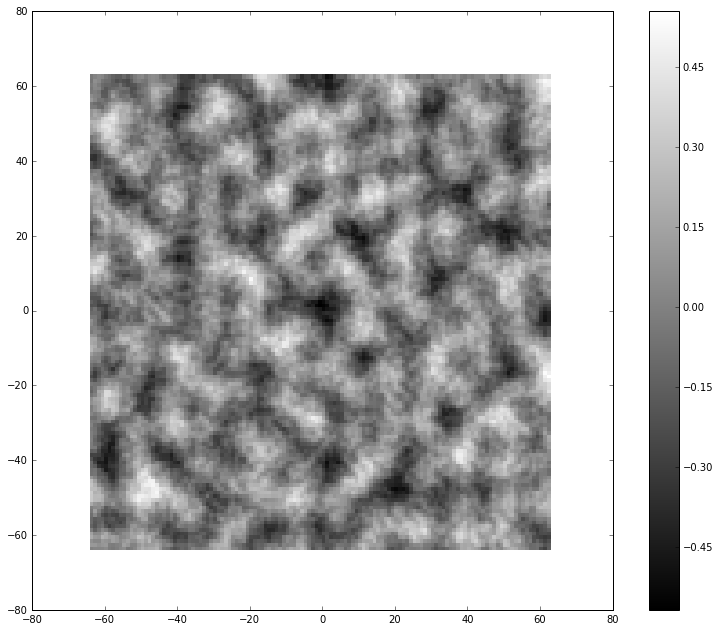

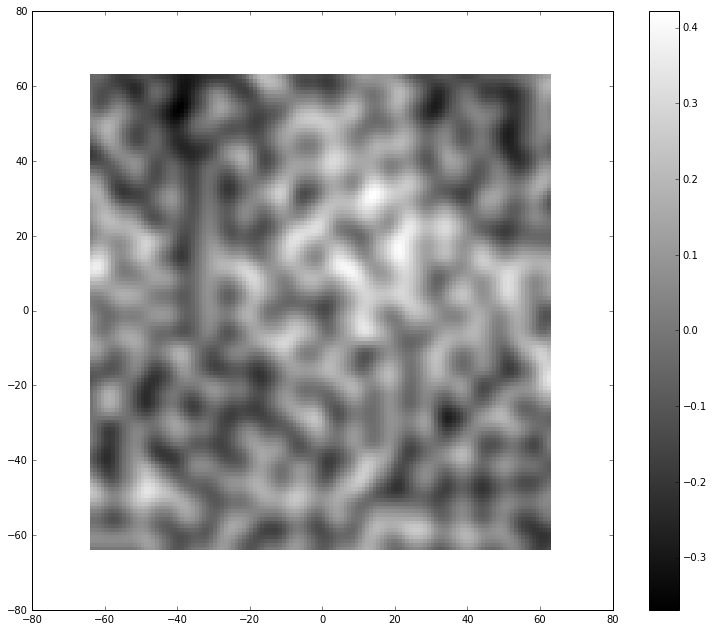

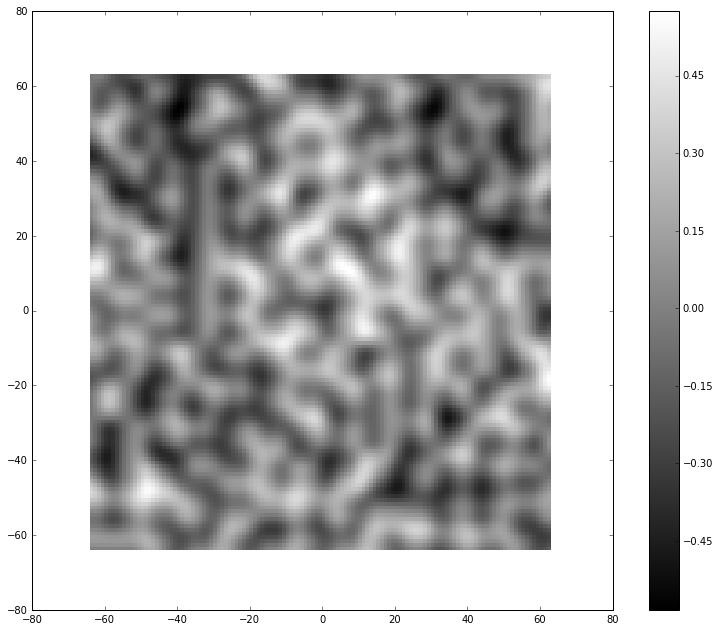

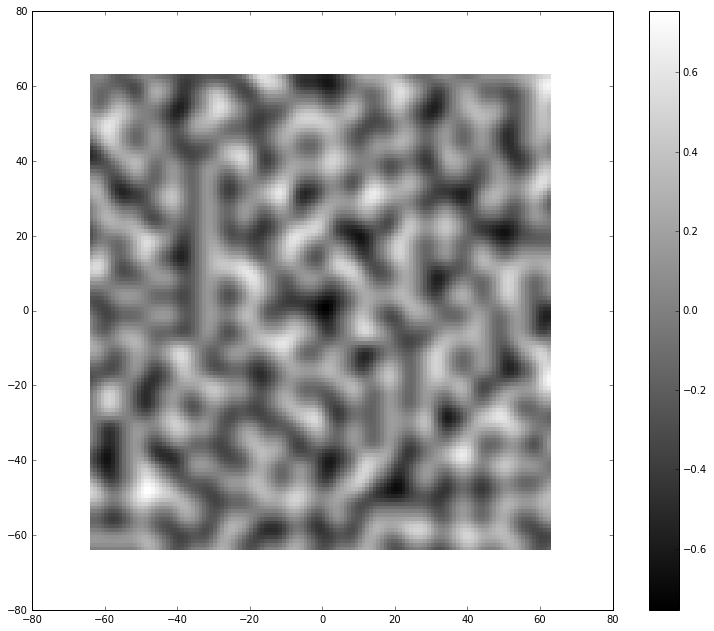

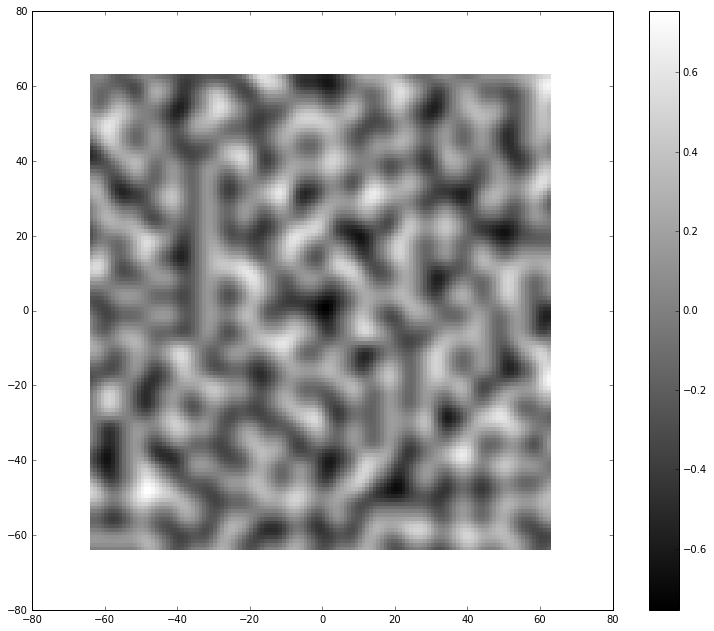

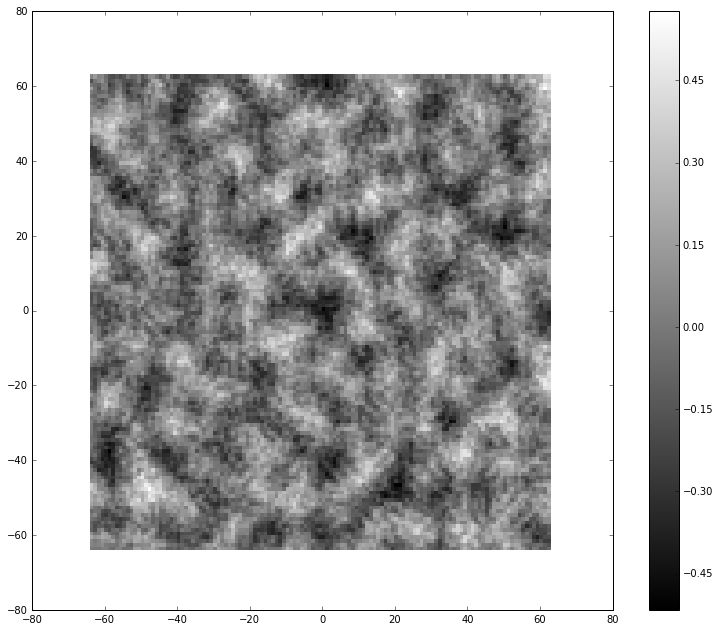

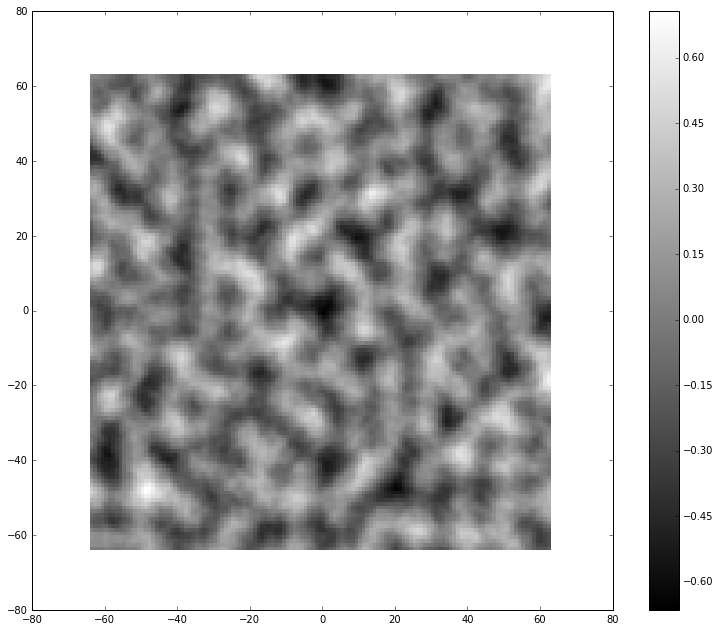

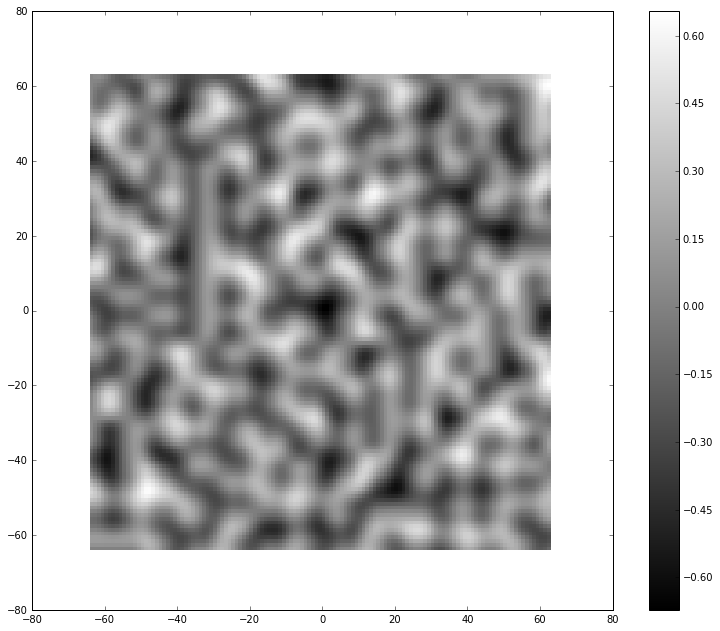

In [18]:
%%timeit
shape = (128,128)
scale = 10                                 #default: 100
octaves = int(6 * abs(np.random.randn()))  #number of passes for generating fBm noise
if octaves == 0: octaves += 1              #octave minimum value is 1
persistence = 0.5 * abs(np.random.randn()) #amplitude of each successive octave relative to the one below it
lacunarity = 2.0 * abs(np.random.randn())  #frequency of each successive octave relative to the one below it

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale,
                                    j/scale,
                                    octaves=octaves,
                                    persistence=persistence,
                                    lacunarity=lacunarity,
                                    repeatx=shape[0], #interval along x-axis when the noise values repeat
                                    repeaty=shape[1], #interval along x-axis when the noise values repeat
                                    base=0)           #fixed offset for the input coordinates (useful for generating different noise textures with the same repeat interval)

print(world.shape)
fig, ax = plt.subplots(figsize=(13,10.725))
cmap = ax.pcolor(np.arange(-64,64), np.arange(-64,64), world, cmap=plt.gray())
fig.colorbar(cmap)

### Transformer la génération de bruit en fonction

In [19]:
def randomized_perlin_noise(shape=(128,128), scale=10, octaves=6, persistence=0.5, lacunarity=2.0, base=0):
    noise_vector = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            noise_vector[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=int(octave * abs(np.random.randn()))+1,
                                        persistence=persistence * abs(np.random.randn()),
                                        lacunarity=lacunarity * abs(np.random.randn()),
                                        repeatx=shape[0], 
                                        repeaty=shape[1], 
                                        base=base)           

    return noise_vector

## En utilisant la librairie motion clouds

In [21]:
help(mc.envelope_gabor)

Help on function envelope_gabor in module MotionClouds:

envelope_gabor(fx, fy, ft, V_X=1.0, V_Y=0.0, B_V=0.5, sf_0=0.125, B_sf=0.1, loggabor=True, theta=0.0, B_theta=0.19634954084936207, alpha=0.0, **kwargs)
    Returns the Motion Cloud kernel, that is the product of:
        * a speed envelope
        * an orientation envelope
        * an orientation envelope



In [22]:
help(mc.random_cloud)

Help on function random_cloud in module MotionClouds:

random_cloud(envelope, seed=None, impulse=False, events=None, do_amp=True)
        Returns a Motion Cloud movie as a 3D matrix from a given envelope.
    
        It first creates a random phase spectrum, multiplies with the envelope and
        then it computes the inverse FFT to obtain the spatiotemporal stimulus.
    
        Options are:
         * use a specific seed to specify the RNG's seed,
         * test the impulse response of the kernel by setting impulse to True
         * test the effect of randomizing amplitudes too by setting do_amp to True
    shape
    
        # TODO : issue a warning if more than 10% of the energy of the envelope falls off the Fourier cube
        # TODO : use a safety sphere to ensure all orientations are evenly chosen



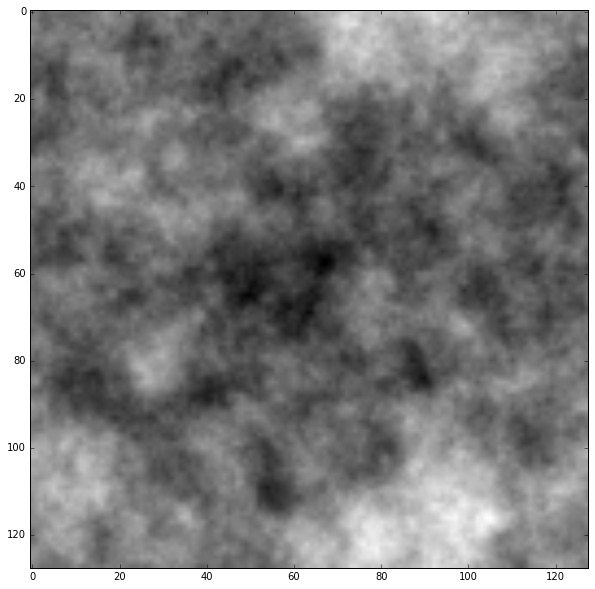

In [37]:
import MotionClouds as mc

def MotionCloudNoise(sf_0=0.125, B_sf=3.):
    mc.N_X, mc.N_Y, mc.N_frame = 128, 128, 1
    fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
    name = 'static'
    env = mc.envelope_gabor(fx, fy, ft, sf_0=sf_0, B_sf=B_sf, B_theta=np.inf, V_X=0., V_Y=0., B_V=0, alpha=.5)
    
    z = mc.rectif(mc.random_cloud(env))
    z = z.reshape((mc.N_X, mc.N_Y))

    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.imshow(z.T, cmap=plt.gray())

MotionCloudNoise()

In [23]:
%%timeit
env = mc.envelope_gabor(fx, fy, ft, sf_0=0.125, B_sf=0.3, B_theta=np.inf, V_X=0., V_Y=0., B_V=0)
z = mc.rectif(mc.random_cloud(env))

3.73 ms ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
